In [1]:
import numpy as np
import pandas as pd
np.random.seed(20)

# 线性影响 + 工具变量

## 数据生成

In [2]:
sample_size = 5000

In [3]:
U = np.random.normal(0, 1, sample_size)
IV1 = np.random.binomial(1, 0.5, sample_size)
IV2 = np.random.normal(0, 1, sample_size)
X1 = np.random.uniform(0, 1, sample_size)
X2 = np.random.normal(0, 1, sample_size)
W1 = np.random.binomial(1, 0.5, sample_size)
W2 = np.random.uniform(0, 1, sample_size)
W3 = np.random.normal(0, 1, sample_size)

In [4]:
df = pd.DataFrame({'U':U, 'IV1':IV1, 'IV2':IV2, 'X1':X1, 'X2':X2, 'W1':W1, 'W2':W2, 'W3':W3})

In [5]:
df['X1'] = df['X1'].apply(lambda x: 0 if x < 1/3 else (1 if x < 2/3 else 2))
df['W2'] = df['W2'].apply(lambda x: 0 if x < 1/3 else (1 if x < 2/3 else 2))

In [6]:
'''
U normal
IV1 binomial
IV2 normal
X1 discrete
X2 normal
W1 binomial
W2 discrete
W3 normal
'''

'\nU normal\nIV1 binomial\nIV2 normal\nX1 discrete\nX2 normal\nW1 binomial\nW2 discrete\nW3 normal\n'

In [7]:
df['T'] = 0.2 * df['U'] + 0.2 * df['IV1'] + 0.5 * df['IV2'] + 0.7 * df['W1'] + 0.5 * df['W2'] + 0.3 * df['W3']
df['true_HTE'] = 0.5 * df['X1'] + 0.3 * df['W1'] + 0.7 * df['W3']
df['T'] = df['T'].apply(lambda x : round(np.exp(x)/(np.exp(x)+1) + np.random.normal(0, 0.05)-0.2))
df['HTE'] = df['true_HTE'].apply(lambda x : x + np.random.normal(0, 0.02))
df['Y'] = 0.3 * df['U'] + df['X1'] + 0.5 * df['X2'] + 0.2 * df['W1'] + 0.7 * df['W2'] + 0.5 * df['W3'] + df['HTE'] * df['T']
df['Y'] = df['Y'] + np.random.normal(0, 0.1)

In [8]:
df.describe()

,U,IV1,IV2,X1,X2,W1,W2,W3,T,true_HTE,HTE,Y
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.001153,0.506400,0.002017,0.994000,-0.010051,0.498200,0.987600,0.023218,0.541000,0.662713,0.663025,2.376374
std,0.988642,0.500009,1.003394,0.809256,1.007270,0.500047,0.816811,1.004113,0.498366,0.829422,0.829786,1.770173
min,-3.803853,0.000000,-3.841058,0.000000,-3.697959,0.000000,0.000000,-3.403990,0.000000,-2.382793,-2.358200,-2.371548
25%,-0.688121,0.000000,-0.652245,0.000000,-0.696655,0.000000,0.000000,-0.654536,0.000000,0.102254,0.102364,1.084852
50%,0.018414,1.000000,-0.005002,1.000000,-0.010182,0.000000,1.000000,0.034311,1.000000,0.655352,0.653695,2.200946
75%,0.660204,1.000000,0.666014,2.000000,0.683999,1.000000,2.000000,0.684923,1.000000,1.230787,1.231227,3.512096
max,4.035029,1.000000,3.324141,2.000000,3.652181,1.000000,2.000000,3.886301,1.000000,3.520411,3.521015,9.862137


In [93]:
df=pd.read_csv('data/causal_test_data.csv')

## 可视化

In [101]:
import numpy as np	# 加载数学库用于函数描述
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

matplotlib.rcParams['text.usetex'] = False # 开启Latex风格
plt.figure(figsize=(150, 200), dpi=140)  # 设置图像大小
style.use('ggplot')  # 加载'ggplot'风格
# f, ax = plt.subplots(1, 3)  # 设置子图


<Figure size 21000x28000 with 0 Axes>

<AxesSubplot:xlabel='X1'>

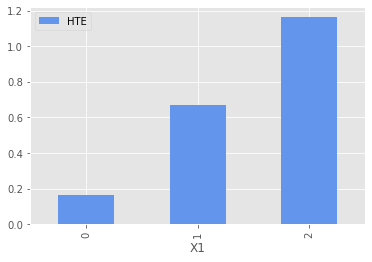

In [102]:
tmp = df[['X1','HTE']].groupby('X1').mean()
tmp.reset_index(inplace = True)
tmp.plot(kind='bar', x='X1',color='cornflowerblue')

<AxesSubplot:xlabel='W1'>

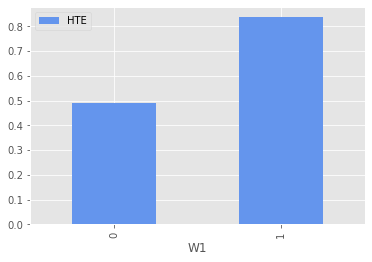

In [103]:
tmp = df[['W1','HTE']].groupby('W1').mean()
tmp.reset_index(inplace = True)
tmp.plot(kind='bar', x='W1',color='cornflowerblue')

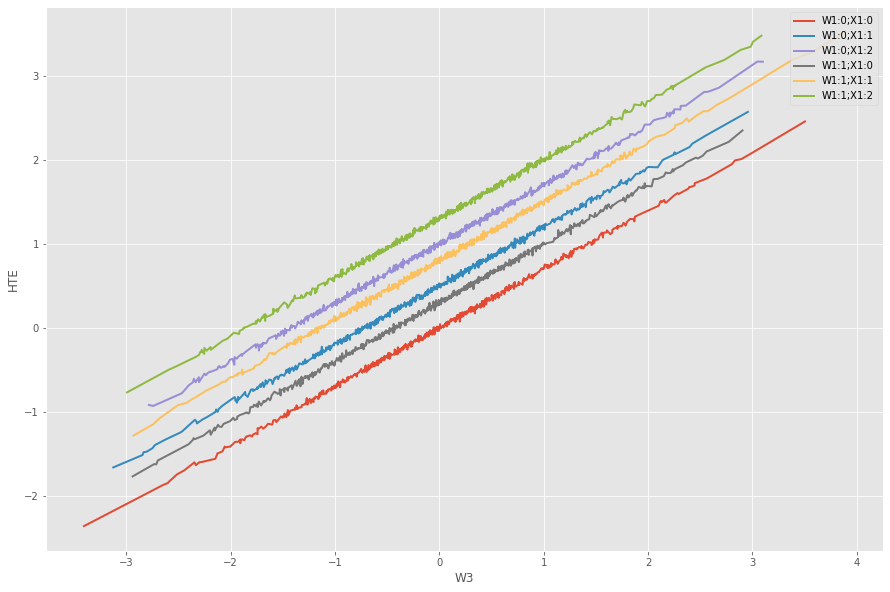

In [94]:
plt.figure(figsize=(15, 10))
for w in [0,1]:
    for x in [0,1,2]:
        tmp = df.copy(deep=True)
        tmp = tmp[(tmp['W1'] == w) & (tmp['X1'] == x)].sort_values('W3')
        X = tmp['W3']
        Y = tmp['HTE']
        label_name = 'W1:%d;X1:%d' % (w, x)
        plt.plot(X, Y, linewidth=2, linestyle="-" ,label=label_name)
plt.xlabel('W3')
plt.ylabel('HTE')
plt.legend(loc='upper right')
plt.show()

# 非线性影响（倒U型） 无工具变量

## 数据生成

In [2]:
sample_size = 5000

In [3]:
U = np.random.normal(0, 1, sample_size)
X1 = np.random.uniform(0, 1, sample_size)
X2 = np.random.normal(0, 1, sample_size)
W1 = np.random.binomial(1, 0.5, sample_size)
W2 = np.random.uniform(0, 1, sample_size)
W3 = np.random.normal(0, 1, sample_size)
df = pd.DataFrame({'U':U,'X1':X1, 'X2':X2, 'W1':W1, 'W2':W2, 'W3':W3})

In [4]:
'''
X1:01
W2:discret
'''
df['X1'] = df['X1'].apply(lambda x: 0 if x < 1/3 else (1 if x < 2/3 else 2))
df['W2'] = df['W2'].apply(lambda x: 0 if x < 1/3 else (1 if x < 2/3 else 2))

In [17]:
df['T'] = 0.2 * df['U'] + 0.7 * df['W1'] + 0.5 * df['W2'] + 0.3 * df['W3']
df['HTE'] = 0.5 * df['X1'] + 0.4 * df['W1'] + 0.7 * df['W3']
df['HTE'] = df['HTE'].apply(lambda x : (x-1)**2 + np.random.normal(0, 0.02))
df['T'] = df['T'].apply(lambda x : round(np.exp(x)/(np.exp(x)+1) + np.random.normal(0, 0.05)-0.2))
df['Y'] = 0.3 * df['U'] + df['X1'] + 0.5 * df['X2'] + 0.2 * df['W1'] + 0.7 * df['W2'] + 0.5 * df['W3'] + df['HTE'] * df['T']
df['Y'] = df['Y'] + np.random.normal(0, 0.1)

In [88]:
df.to_csv('data/causal_test_data_u.csv')

## 可视化

In [51]:
import numpy as np	# 加载数学库用于函数描述
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

matplotlib.rcParams['text.usetex'] = False # 开启Latex风格
plt.figure(figsize=(150, 200), dpi=140)  # 设置图像大小
style.use('ggplot')  # 加载'ggplot'风格
# f, ax = plt.subplots(1, 3)  # 设置子图


<Figure size 21000x28000 with 0 Axes>

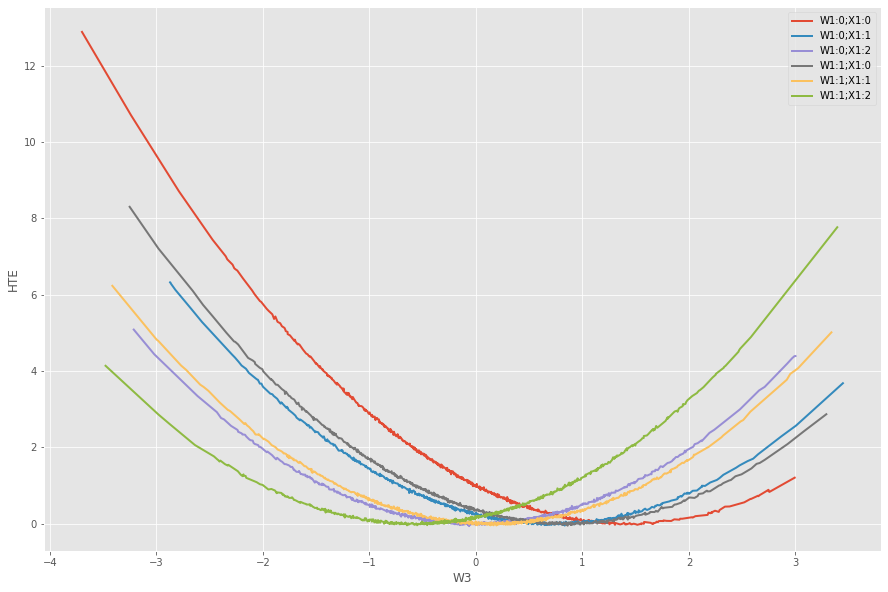

In [90]:
plt.figure(figsize=(15, 10))
for w in [0,1]:
    for x in [0,1,2]:
        tmp = df.copy(deep=True)
        tmp = tmp[(tmp['W1'] == w) & (tmp['X1'] == x)].sort_values('W3')
        X = tmp['W3']
        Y = tmp['HTE']
        label_name = 'W1:%d;X1:%d' % (w, x)
        plt.plot(X, Y, linewidth=2, linestyle="-" ,label=label_name)
plt.xlabel('W3')
plt.ylabel('HTE')
plt.legend(loc='upper right')
plt.show()

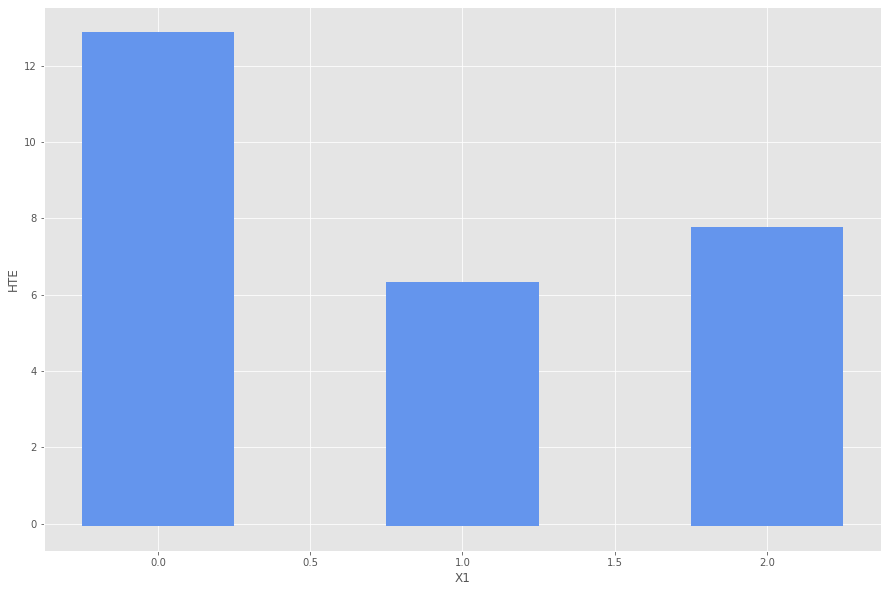

In [91]:
plt.figure(figsize=(15, 10))
tmp = df[['X1','HTE']].groupby('X1').mean()
tmp.reset_index(inplace = True)
plt.bar(df['X1'], df['HTE'],width=0.5, color = 'cornflowerblue')
plt.xlabel('X1')
plt.ylabel('HTE')
plt.show()

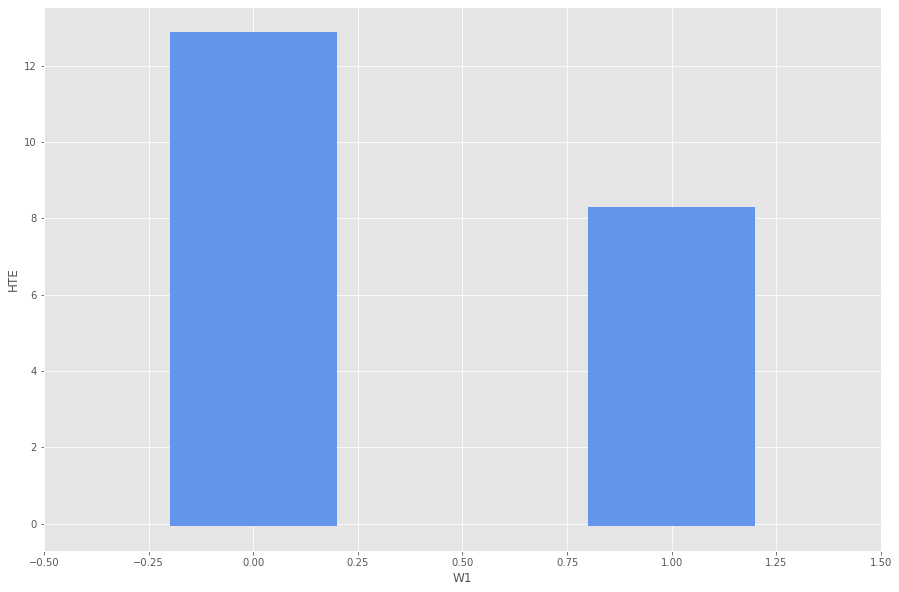

In [92]:
plt.figure(figsize=(15, 10))
tmp = df[['W1','HTE']].groupby('W1').mean()
tmp.reset_index(inplace = True)
plt.xlim(-0.5,1.5)
plt.bar(df['W1'], df['HTE'],width=0.4, color = 'cornflowerblue')
plt.xlabel('W1')
plt.ylabel('HTE')
plt.show()